## Chapter 8 Assignment

In [67]:
import pandas as pd
import seaborn as sns
avocado = pd.read_csv('avocado.csv')

In [69]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [71]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [73]:
avocado['Date'] = pd.to_datetime(avocado['Date'], errors='coerce')
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [75]:
filtered_avocado = avocado.query("year == 2015 and type == 'conventional' and region == 'Albany'")
new_avocado = filtered_avocado[['Date', 'Total Bags', 'Small Bags']]
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [77]:
melted_avocado = pd.melt(avocado, id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'], 
                    var_name='Bags', value_name='Count')
melted_avocado

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
36493,2018-02-04,Small Bags,13066.82
36494,2018-01-28,Small Bags,8940.04
36495,2018-01-21,Small Bags,9351.80
36496,2018-01-14,Small Bags,10919.54


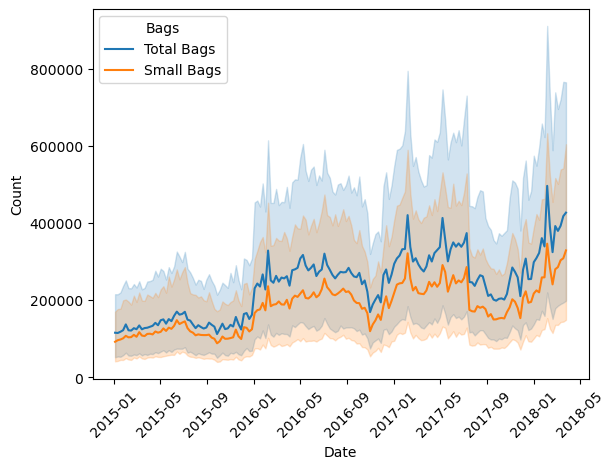

In [79]:
import matplotlib.pyplot as plt
sns.lineplot(data=melted_avocado, x='Date', y='Count', hue='Bags')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [82]:
quantile_labels = ['Poor', 'Modest', 'Good', 'Excellent']
avocado['Sales Volume'] = pd.qcut(avocado['Total Volume'], q=4, labels=quantile_labels)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest


([0, 1, 2, 3],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

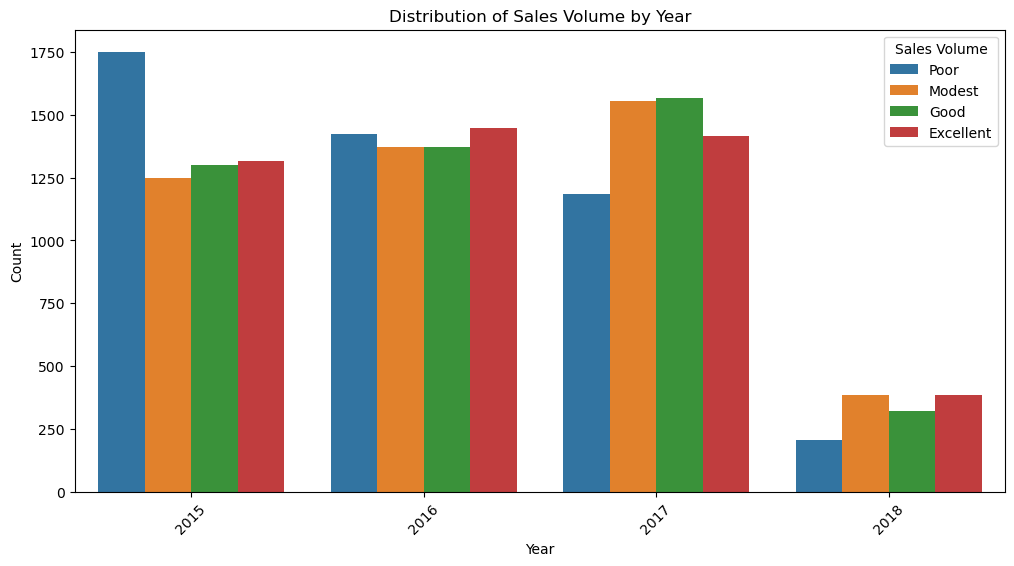

In [85]:
quantile_labels = ['Poor', 'Modest', 'Good', 'Excellent']
avocado['Sales Volume'] = pd.qcut(avocado['Total Volume'], q=4, labels=quantile_labels)
avocado['Year'] = avocado['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(data=avocado, x='Year', hue='Sales Volume')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Sales Volume by Year')
plt.xticks(rotation=45)

In [88]:
melted_avocado = pd.melt(avocado, id_vars=['Year'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],
                    var_name='Bags', value_name='Count')
melted_avocado

,Year,Bags,Count
0,2015,Small Bags,8603.62
1,2015,Small Bags,9408.07
2,2015,Small Bags,8042.21
3,2015,Small Bags,5677.40
4,2015,Small Bags,5986.26
...,...,...,...
54742,2018,XLarge Bags,0.00
54743,2018,XLarge Bags,0.00
54744,2018,XLarge Bags,0.00
54745,2018,XLarge Bags,0.00


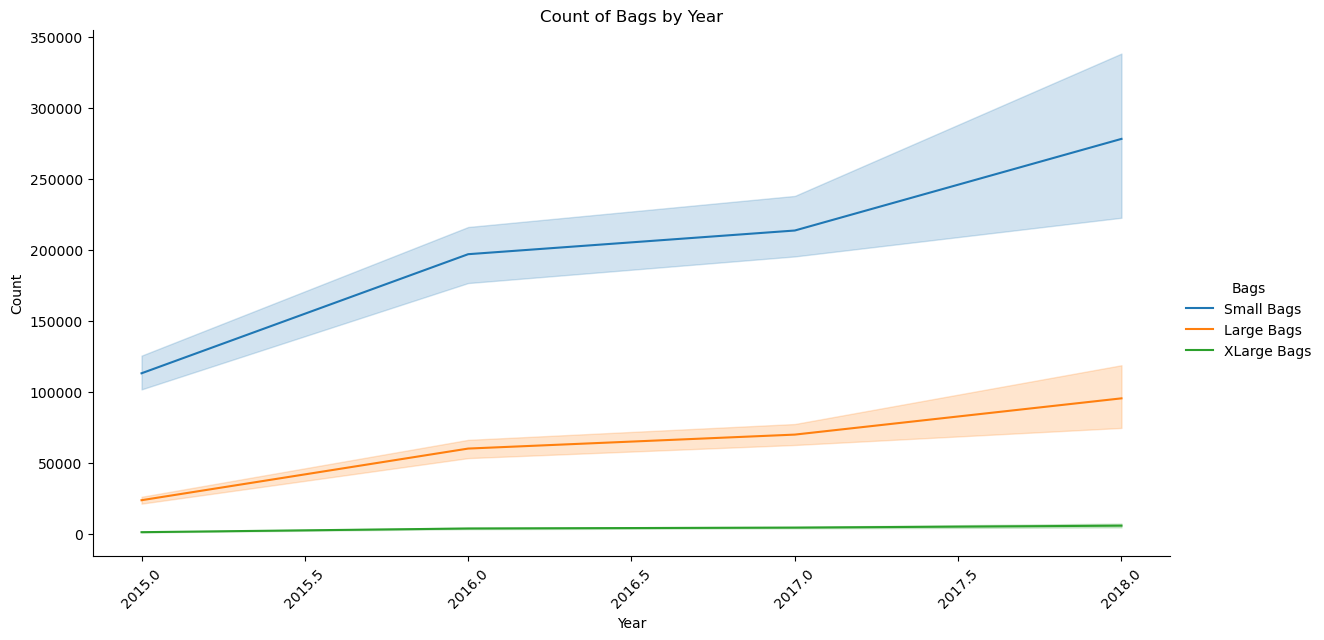

In [91]:
sns.relplot(data=melted_avocado, x='Year', y='Count', hue='Bags', kind='line', height=6, aspect=2)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Bags by Year')
plt.xticks(rotation=45)
plt.show()

## Small Bags Sell Best